In [18]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 7)
sns.set()

In [12]:
comparison_id = '0131_1046' # or 0228_2226 for recent run
results_path = '../results/comparisons/grid_comparison_{}_scores.csv'.format(comparison_id)

# Dataframe containing comparisons results between different architectures
df = pd.read_csv(results_path)
initial_df = df

We format the results df to see clearly the hyperparameters

In [13]:
# convert the config params dict in the df to python dicts
n = df.shape[0]

config_params = []
for i in range(n):
    config_params.append(ast.literal_eval(df.loc[i, 'config_params']))

# we assume that config params are the same for all runs
for key in config_params[0].keys():
    params = [config_params[i][key] for i in range(n)]
    df[key] = params
    
# df with the confusion matrix and other
full_df = df

# keep most important infos
df = df.drop(['Unnamed: 0', 'cm', 'config_params', 'max_epochs', 'lr', 'module__dropout', 
              'module__preprocess', 'module__conv_type', 'module__temporal_attention'],
             axis=1)

Convert the list of nb of layers (module__channel_list e.g.) to readable columns

In [14]:
for i in range(n):
    c_list = df.loc[i, 'module__channel_list']
    h_layers = df.loc[i, 'module__fc_hidden_layers']
    
    for j, c in enumerate(c_list):
        df.loc[i, 'layer_{}_channels'.format(j)] = c[0]
        df.loc[i, 'layer_{}_groups'.format(j)] = c[1]
    
    df.loc[i, 'fc_layer_0'] = h_layers[0]
    df.loc[i, 'fc_layer_1'] = h_layers[1]

# convert channel list to a string (for category dtype)
df['module__channel_list'] = df['module__channel_list'].apply(lambda x: x.__str__()).astype('category')

In [16]:
df

,acc,config_id,f1_score,batch_size,module__activation_fct,module__channel_list,module__fc_hidden_layers,layer_0_channels,layer_0_groups,layer_1_channels,layer_1_groups,layer_2_channels,layer_2_groups,fc_layer_0,fc_layer_1,layer_3_channels,layer_3_groups
0,0.888889,104623,0.887894,8,prelu,"[(66, 3), (66, 3), (66, 3)]","[1400, 70]",66.0,3.0,66.0,3.0,66.0,3.0,1400.0,70.0,NaN,NaN
1,0.903226,110844,0.903076,32,prelu,"[(66, 3), (66, 3), (66, 3)]","[1400, 70]",66.0,3.0,66.0,3.0,66.0,3.0,1400.0,70.0,NaN,NaN
2,0.879331,111858,0.880273,64,prelu,"[(66, 3), (66, 3), (66, 3)]","[1400, 70]",66.0,3.0,66.0,3.0,66.0,3.0,1400.0,70.0,NaN,NaN
3,0.911589,112356,0.911553,128,prelu,"[(66, 3), (66, 3), (66, 3)]","[1400, 70]",66.0,3.0,66.0,3.0,66.0,3.0,1400.0,70.0,NaN,NaN
4,0.888889,112920,0.889775,256,prelu,"[(66, 3), (66, 3), (66, 3)]","[1400, 70]",66.0,3.0,66.0,3.0,66.0,3.0,1400.0,70.0,NaN,NaN
5,0.844683,113256,0.841867,512,prelu,"[(66, 3), (66, 3), (66, 3)]","[1400, 70]",66.0,3.0,66.0,3.0,66.0,3.0,1400.0,70.0,NaN,NaN
6,0.894863,113712,0.896058,64,prelu,"[(66, 3), (66, 3), (66, 3)]","[1400, 70]",66.0,3.0,66.0,3.0,66.0,3.0,1400.0,70.0,NaN,NaN
7,0.856631,114300,0.856009,64,relu,"[(66, 3), (66, 3), (66, 3)]","[1400, 70]",66.0,3.0,66.0,3.0,66.0,3.0,1400.0,70.0,NaN,NaN
8,0.903226,114728,0.903532,64,prelu,"[(66, 3)]","[1400, 70]",66.0,3.0,NaN,NaN,NaN,NaN,1400.0,70.0,NaN,NaN
9,0.898447,115204,0.898845,64,prelu,"[(66, 3), (66, 3)]","[1400, 70]",66.0,3.0,66.0,3.0,NaN,NaN,1400.0,70.0,NaN,NaN


First, look at the accuracy and f1-score

/Users/alexandre/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


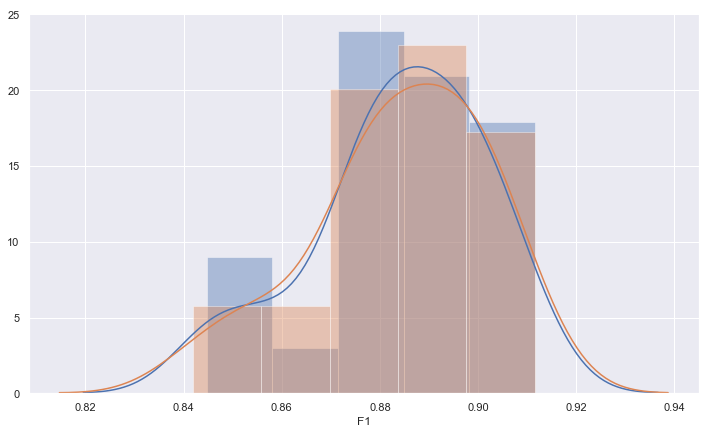

In [6]:
ax = sns.distplot(df['acc'], axlabel='Accuracy')
sns.distplot(df['f1_score'], axlabel='F1')

## Study hyperparameters influence

First, the batch size

It seems that, with default configuration, optimal batch size is around 128.

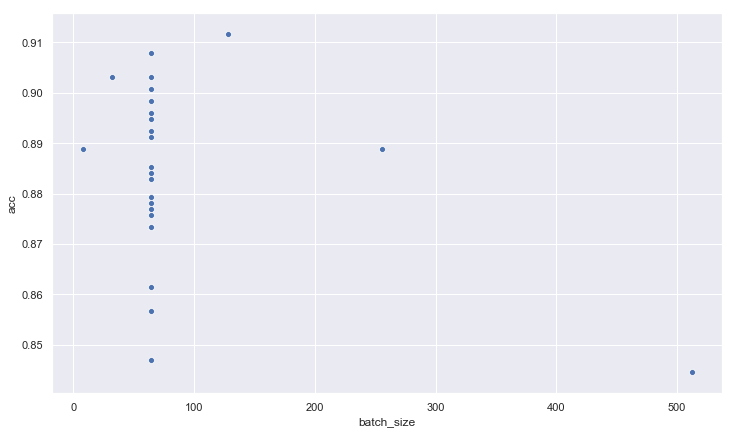

In [7]:
sns.scatterplot(x='batch_size', y='acc', data=df)

For the activation function, we need more data

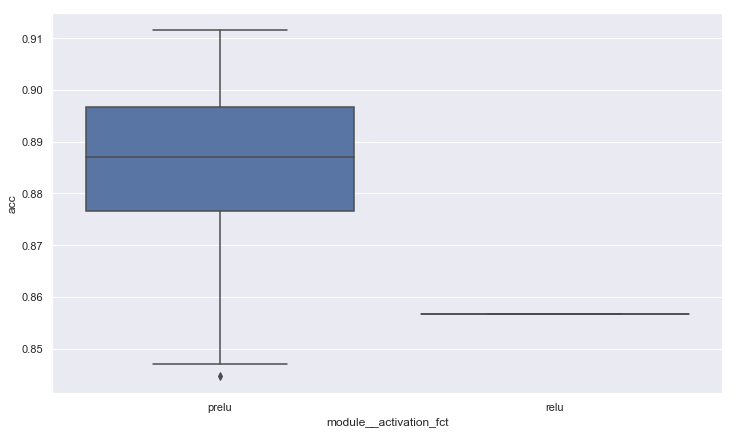

In [21]:
sns.boxplot(x='module__activation_fct', y='acc', data=df)

Look at the hidden layers

We have 2 fully-connected layers before the output, it goes like this :
fc_layer_0 -> fc_layer_1 -> nb_gestures

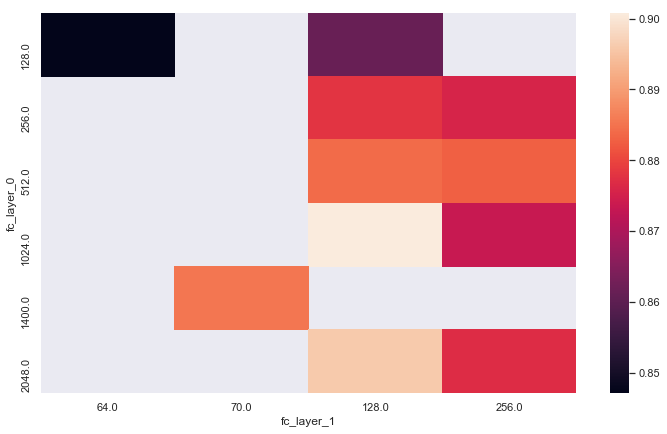

In [9]:
# select only the rows where fc_hidden_layers changes, and make it a 2D array
df_h = df.iloc[14:,:]
df_h = df_h.pivot_table(values='acc', index='fc_layer_0', columns='fc_layer_1')

sns.heatmap(df_h)

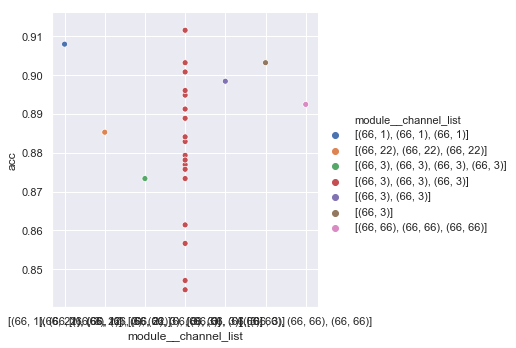

In [20]:
sns.relplot(x='module__channel_list', y='acc', hue='module__channel_list', data=df)